<a href="https://colab.research.google.com/github/Matvezy/Regression-Line/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd  

Matvei Popov assignment on Linear regression, for Code in

The code has way too many comments, I did it on purpose, in order to clearify everything for myself, and to remember what is going on.

Function that generates random, dummie data set for age(years) and height(centimeters)

In [0]:
def generate_dataset():
 x_batch = np.linspace(0, 2, 100)
 y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
 return x_batch, y_batch

Function for defining variables for regression line 

In [0]:
def linear_regression():
  # x,y are placeholders for now
  x = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y = tf.placeholder(tf.float32, shape=(None, ), name='y')

  with tf.variable_scope('lreg') as scope:
    # W stands for gradient(slope) of regression line, placeholder for now
    w = tf.Variable(np.random.normal(), name='W')
    # b stands for y-inercept of regression line, placeholder for now
    b = tf.Variable(np.random.normal(), name='b')
		#equation for regression line
    y_pred = tf.add(tf.multiply(w, x), b)
    #loss determines how far the predicted y is from actual y
    loss = tf.reduce_mean(tf.square(y_pred - y))
  return x, y, y_pred, loss

Computing the graph

0 loss: 0.3614228
1 loss: 0.15000267
2 loss: 0.082869165
3 loss: 0.061495543
4 loss: 0.05463796
5 loss: 0.052388407
6 loss: 0.051604677
7 loss: 0.0512901
8 loss: 0.051128324
9 loss: 0.05101882
10 loss: 0.05092945
11 loss: 0.050849825
12 loss: 0.05077643
13 loss: 0.05070796
14 loss: 0.05064382
15 loss: 0.050583668
16 loss: 0.050527204
17 loss: 0.05047421
18 loss: 0.050424468
19 loss: 0.050377764
20 loss: 0.050333932
21 loss: 0.050292786
22 loss: 0.05025417
23 loss: 0.050217915
24 loss: 0.05018388
25 loss: 0.05015194
26 loss: 0.05012195
27 loss: 0.0500938
28 loss: 0.05006738
29 loss: 0.050042573
30 loss: 0.050019287
31 loss: 0.049997434
32 loss: 0.049976915
33 loss: 0.049957663
34 loss: 0.049939584
35 loss: 0.04992262
36 loss: 0.049906682
37 loss: 0.04989173
38 loss: 0.049877696
39 loss: 0.049864516
40 loss: 0.04985215
41 loss: 0.049840536
42 loss: 0.049829636
43 loss: 0.049819414
44 loss: 0.04980981
45 loss: 0.049800787
46 loss: 0.049792334
47 loss: 0.049784385
48 loss: 0.049776934
49 l

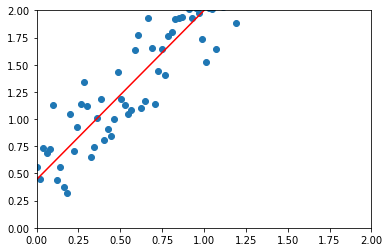

In [39]:
def run():
  #implementing above functions
  x_batch, y_batch = generate_dataset()
  x, y, y_pred, loss = linear_regression()

  optimizer = tf.train.GradientDescentOptimizer(0.1)
  train_op = optimizer.minimize(loss)

  with tf.Session() as session:
    # Initializing variables
    session.run(tf.global_variables_initializer()) 
    feed_dict = {x: x_batch, y: y_batch}
		# train n (60) times
    for i in range(60):
      #evaluate tensor into fetch
      session.run(train_op, feed_dict)
      print(i, "loss:", loss.eval(feed_dict))

    print('Predicting')
    #preforming inference, we have trained W and b, which means that we can not waste time on training again
    y_pred_batch = session.run(y_pred, {x : x_batch})

  #constructing a plot
  plt.scatter(x_batch, y_batch)
  plt.plot(x_batch, y_pred_batch, color='red')
  plt.xlim(0, 2)
  plt.ylim(0, 2)
  plt.savefig('plot.png')


if __name__ == "__main__":
  run()

In [0]:
dataset = pd.read_csv()